# 1. 데이터 & 라이브러리 준비

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import openpyxl
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_excel("steel_data.xlsx", header=0, skiprows=[1])
df.head()

,Unnamed: 0,Unnamed: 1,Density,Hardness,Tensile Strength ultimate,Yield Strength,Modulus of Elasticity,Poisson's Ratio,%Elongation at break,Thermal conductivity,Specific Heat Cpacity,Coefficient of thermal expansion,Electrical Resistivity
0,AISI 1006 Steel,cold drawn,7.872,95,330,285,205,0.29,20.0,51.9,0.481,12.6,0.000017
1,AISI 1006 Steel,hot rolled,7.872,86,295,165,200,0.29,30.0,51.9,0.481,12.6,0.000017
2,AISI 1020 Steel,cold rolled,7.870,121,420,350,205,0.29,15.0,51.9,0.486,11.7,0.000016
3,AISI 1020 Steel,normalizaed,7.870,131,440,345,200,0.29,35.8,51.9,0.486,11.7,0.000016
4,AISI 1020 Steel,annealed,7.870,111,395,295,200,0.29,36.5,51.9,0.486,11.7,0.000016


In [ ]:
mechanical_cols = ["Density", "Hardness", "Tensile Strength ultimate", "Yield Strength", "Modulus of Elasticity", "Poisson's Ratio", "%Elongation at break"]
thermal_cols = ["Thermal conductivity", "Specific Heat Cpacity", "Coefficient of thermal expansion"]
electrical_cols = ["Electrical Resistivity"]

#2. K-means Clustering

In [ ]:
def perform_kmeans_clustering(df, properties, title):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[properties])

    max_clusters = min(10, len(df) - 1)
    cluster_range = range(2, max_clusters + 1)

    silhouette_scores = []

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data_scaled)

        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

    plt.figure(figsize=(10, 6))
    plt.plot(list(cluster_range), silhouette_scores, marker='o')
    plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Optimal number of clusters: {optimal_clusters}')
    plt.title(f'Silhouette Score for {title}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.legend()
    plt.show()

    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(data_scaled)

    print(f"\n{title}에 대한 최적 클러스터 수: {optimal_clusters}")
    print(f"최적 클러스터 수에 대한 실루엣 점수: {silhouette_scores[np.argmax(silhouette_scores)]:.4f}")
    print(f"클러스터 분포:")
    print(df['Cluster'].value_counts().sort_index())

    return optimal_clusters, df['Cluster'], kmeans.cluster_centers_

### 1) Mechanical Properties

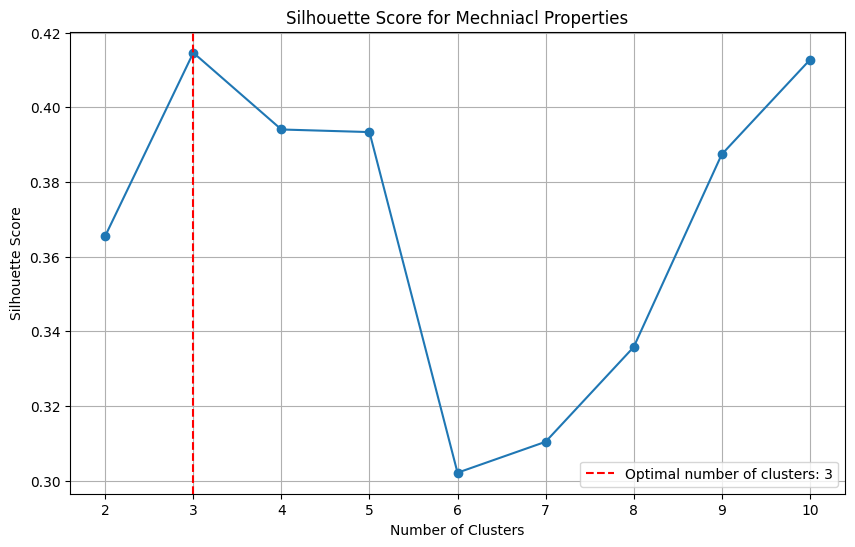


Mechniacl Properties에 대한 최적 클러스터 수: 3
최적 클러스터 수에 대한 실루엣 점수: 0.4146
클러스터 분포:
Cluster
0    21
1    10
2     3
Name: count, dtype: int64


In [ ]:
optimal_mech, labels_mech, centers_mech = perform_kmeans_clustering(df, mechanical_cols, 'Mechniacl Properties')

### 2) Thermal Properties

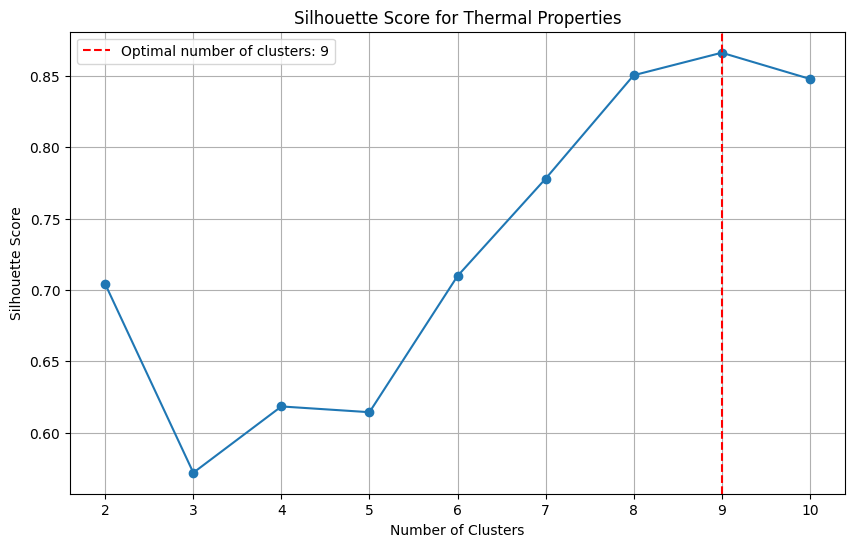


Thermal Properties에 대한 최적 클러스터 수: 9
최적 클러스터 수에 대한 실루엣 점수: 0.8664
클러스터 분포:
Cluster
0    4
1    3
2    2
3    3
4    7
5    9
6    2
7    2
8    2
Name: count, dtype: int64


In [ ]:
optimal_therm, labels_therm, centers_therm = perform_kmeans_clustering(df, thermal_cols, 'Thermal Properties')

### 3) Electrical Properties

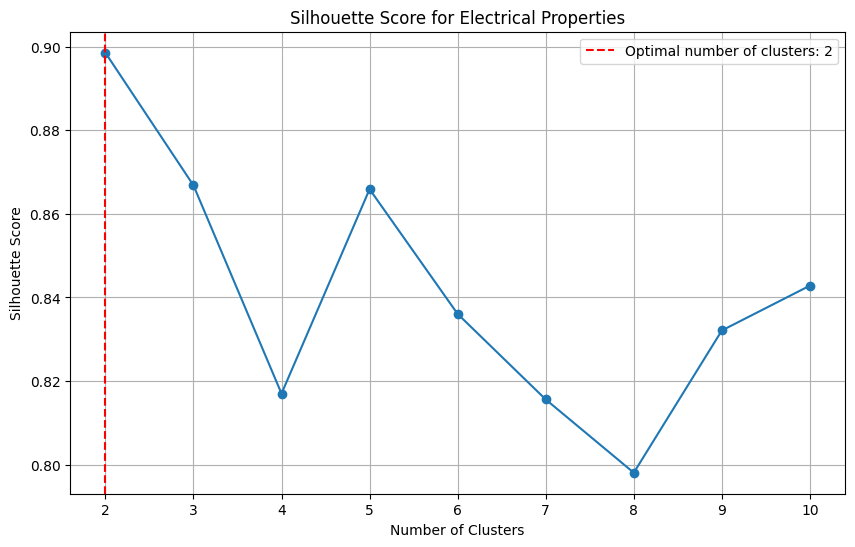


Electrical Properties에 대한 최적 클러스터 수: 2
최적 클러스터 수에 대한 실루엣 점수: 0.8985
클러스터 분포:
Cluster
0    27
1     7
Name: count, dtype: int64


In [ ]:
optimal_elec, labels_elec, centers_elec = perform_kmeans_clustering(df, electrical_cols, 'Electrical Properties')

In [ ]:
# 결과 요약
print("="*50)
print("K-menas 클러스터링 결과 요약")
print("="*50)
print(f"Mechanical Properties 대한 최적 클러스터 수: {optimal_mech}")
print(f"Thermal Properties 대한 최적 클러스터 수: {optimal_therm}")
print(f"Electrical Properties 대한 최적 클러스터 수: {optimal_elec}")

K-menas 클러스터링 결과 요약
Mechanical Properties 대한 최적 클러스터 수: 4
Thermal Properties 대한 최적 클러스터 수: 9
Electrical Properties 대한 최적 클러스터 수: 2


# 3. Visualize Clusters for Thermal Properties

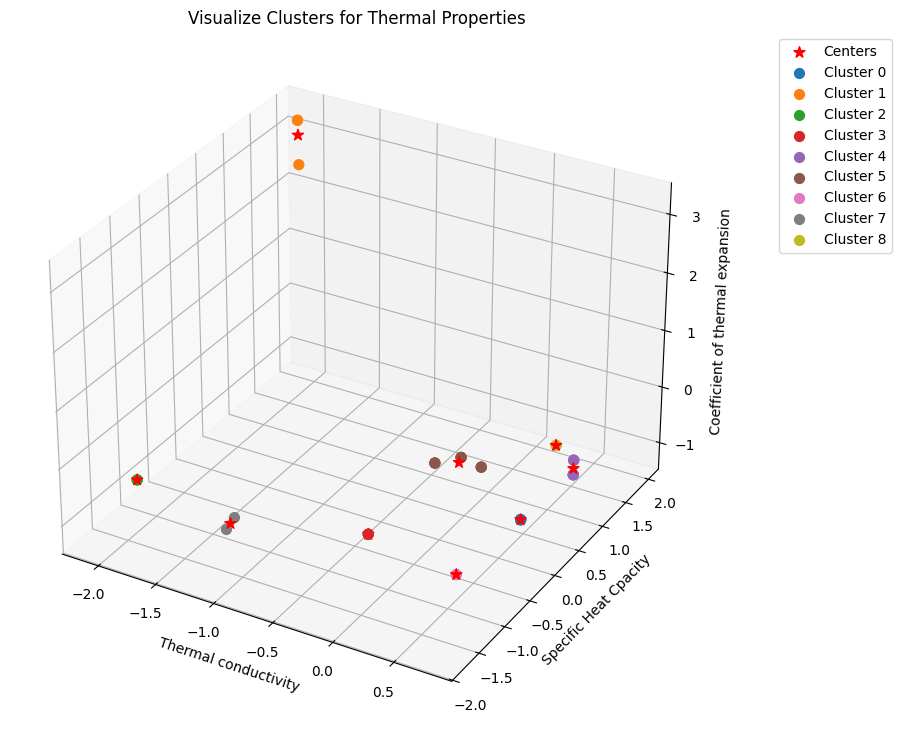

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[thermal_cols])
df_scaled = pd.DataFrame(data_scaled, columns=thermal_cols)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    centers_therm[:, 0],
    centers_therm[:, 1],
    centers_therm[:, 2],
    c='red',
    marker='*',
    s=70,
    label='Centers',
    alpha=1
)

unique_labels = np.unique(labels_therm)

for label in unique_labels:
    cluster_data = df_scaled[labels_therm == label]
    ax.scatter(
        cluster_data[thermal_cols[0]],
        cluster_data[thermal_cols[1]],
        cluster_data[thermal_cols[2]],
        label=f'Cluster {label}',
        s=50,
        alpha=1
    )

# 축 라벨 설정
ax.set_xlabel(thermal_cols[0])
ax.set_ylabel(thermal_cols[1])
ax.set_zlabel(thermal_cols[2])
plt.title('Visualize Clusters for Thermal Properties')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

# 4. Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

def perform_hierarchical_clustering(df, properties, title):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[properties])

    max_clusters = min(10, len(df) - 1)
    cluster_range = range(2, max_clusters + 1)

    silhouette_scores = []

    for n_clusters in cluster_range:
        hc = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = hc.fit_predict(data_scaled)

        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

    plt.figure(figsize=(10, 6))
    plt.plot(list(cluster_range), silhouette_scores, marker='o')
    plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Optimal number of clusters: {optimal_clusters}')
    plt.title(f'Silhouette Score for {title}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.legend()
    plt.show()

    hc = AgglomerativeClustering(n_clusters=optimal_clusters)
    final_labels = hc.fit_predict(data_scaled)
    df['Cluster'] = final_labels

    print(f"\n{title}에 대한 최적 클러스터 수: {optimal_clusters}")
    print(f"최적 클러스터 수에 대한 실루엣 점수: {silhouette_scores[np.argmax(silhouette_scores)]:.4f}")
    print("클러스터 분포:")
    print(df['Cluster'].value_counts().sort_index())

    return optimal_clusters

### 1) Mechanical Properties

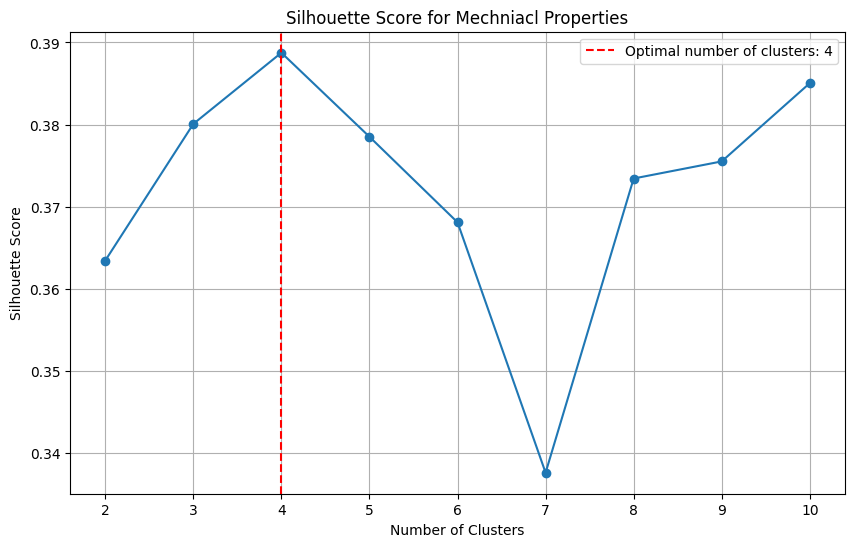


Mechniacl Properties에 대한 최적 클러스터 수: 4
최적 클러스터 수에 대한 실루엣 점수: 0.3888
클러스터 분포:
Cluster
0     9
1     4
2    20
3     1
Name: count, dtype: int64


In [ ]:
optimal_mech = perform_hierarchical_clustering(df, mechanical_cols, 'Mechniacl Properties')

### 2) Thermal Properties

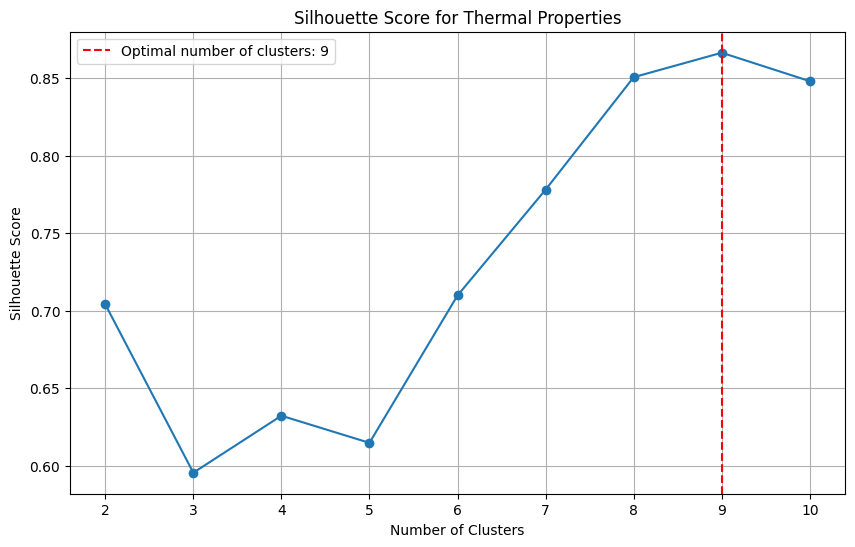


Thermal Properties에 대한 최적 클러스터 수: 9
최적 클러스터 수에 대한 실루엣 점수: 0.8664
클러스터 분포:
Cluster
0    3
1    2
2    9
3    2
4    2
5    7
6    4
7    2
8    3
Name: count, dtype: int64


In [ ]:
optimal_therm = perform_hierarchical_clustering(df, thermal_cols, 'Thermal Properties')

### 3) Electrical Properties

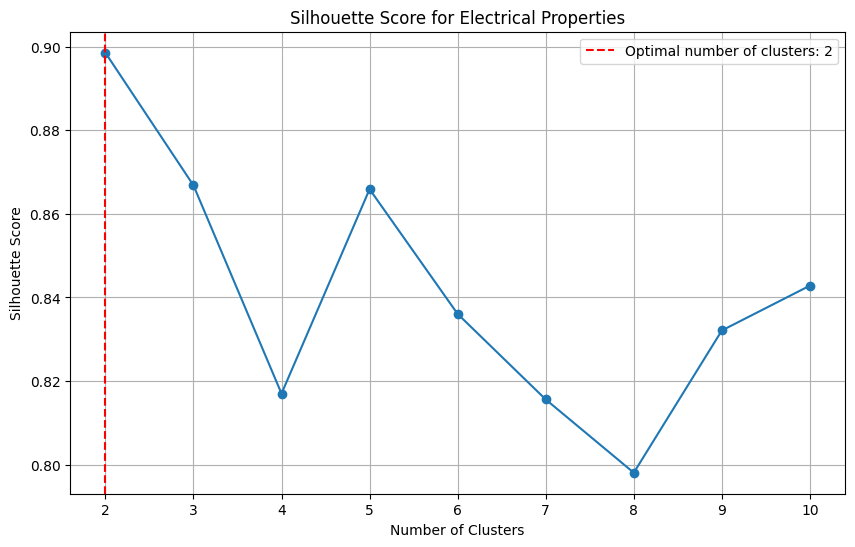


Electrical Properties에 대한 최적 클러스터 수: 2
최적 클러스터 수에 대한 실루엣 점수: 0.8985
클러스터 분포:
Cluster
0     7
1    27
Name: count, dtype: int64


In [ ]:
optimal_elec = perform_hierarchical_clustering(df, electrical_cols, 'Electrical Properties')

In [ ]:
# 결과 요약
print("="*50)
print("Hierarchical Clustering 클러스터링 결과 요약")
print("="*50)
print(f"Mechanical Properties 대한 최적 클러스터 수: {optimal_mech}")
print(f"Thermal Properties 대한 최적 클러스터 수: {optimal_therm}")
print(f"Electrical Properties 대한 최적 클러스터 수: {optimal_elec}")

Hierarchical Clustering 클러스터링 결과 요약
Mechanical Properties 대한 최적 클러스터 수: 4
Thermal Properties 대한 최적 클러스터 수: 9
Electrical Properties 대한 최적 클러스터 수: 2


# 5. DBSCAN

In [ ]:
def perform_dbscan_clustering(df, properties, title):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[properties])

    # DBSCAN 파라미터 범위 설정
    eps_range = np.linspace(0.1, 2.0, 20)
    min_samples_range = range(2, 11)

    best_score = -1
    best_eps = None
    best_min_samples = None
    best_labels = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data_scaled)

            mask = labels != -1
            unique_labels = set(labels[mask])

            if len(unique_labels) > 1:
                sil_score = silhouette_score(data_scaled[mask], labels[mask])
                if sil_score > best_score:
                    best_score = sil_score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels.copy()

    if best_labels is not None:
        df[f'DBSCAN_Cluster_{title}'] = best_labels
        print(f"최적 eps: {best_eps:.2f}, 최적 min_samples: {best_min_samples}")
        print(f"실루엣 점수: {best_score:.4f}")
        print("클러스터 분포:")
        print(df[f'DBSCAN_Cluster_{title}'].value_counts().sort_index())

        unique_labels = df[f'DBSCAN_Cluster_{title}'].unique()
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        return n_clusters
    else:
        print(f"\n{title}에 대한 DBSCAN 클러스터링 결과: 적절한 클러스터를 찾지 못했습니다.")
        return None

### 1) Mechanical Properties

In [ ]:
optimal_mech = perform_dbscan_clustering(df, mechanical_cols, 'Mechniacl Properties')

최적 eps: 0.60, 최적 min_samples: 3
실루엣 점수: 0.7829
클러스터 분포:
DBSCAN_Cluster_Mechniacl Properties
-1    27
 0     4
 1     3
Name: count, dtype: int64


### 2) Thermal Properties

In [ ]:
optimal_therm = perform_dbscan_clustering(df, thermal_cols, 'Thermal Properties')

최적 eps: 0.10, 최적 min_samples: 4
실루엣 점수: 1.0000
클러스터 분포:
DBSCAN_Cluster_Thermal Properties
-1    26
 0     4
 1     4
Name: count, dtype: int64


### 3) Electrical Properties

In [ ]:
optimal_elec = perform_dbscan_clustering(df, electrical_cols, 'Electrical Properties')

최적 eps: 0.20, 최적 min_samples: 3
실루엣 점수: 0.9355
클러스터 분포:
DBSCAN_Cluster_Electrical Properties
-1     4
 0    27
 1     3
Name: count, dtype: int64


In [ ]:
# 결과 요약
print("="*50)
print("DBSCAN 클러스터링 결과 요약 (노이즈 제외)")
print("="*50)
print(f"Mechanical Properties 대한 최적 클러스터 수: {optimal_mech}")
print(f"Thermal Properties 대한 최적 클러스터 수: {optimal_therm}")
print(f"Electrical Properties 대한 최적 클러스터 수: {optimal_elec}")

DBSCAN 클러스터링 결과 요약 (노이즈 제외)
Mechanical Properties 대한 최적 클러스터 수: 2
Thermal Properties 대한 최적 클러스터 수: 2
Electrical Properties 대한 최적 클러스터 수: 2
